**For data source click** <a href="https://archive.ics.uci.edu/ml/datasets/Hepatitis">Here<a/>

<br/> Author **Shereef Bankole**
<br/> **LinkedIn click** <a href="https://www.linkedin.com/in/shereef-b-b9aab823/\">Here<a/>
<br/> **Github click**  <a href="https://github.com/SAB-6\">Here<a/>

## Table of contents
- [Project objectives](#Project-objectives)
- [Data exploration](#Exploratory-data-analysis)
- [Data Wrangling](#Data-wrangling)
- [Data modelling](#Modelling)
- [Model Evaluation](#Model-evaluation)

## Import Required libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
%matplotlib inline
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
from sklearn.compose import ColumnTransformer, make_column_transformer

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams.update({'font.size': 18})
import warnings
warnings.filterwarnings('ignore')

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data

--2020-07-19 13:42:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7545 (7.4K) [application/x-httpd-php]
Saving to: ‘hepatitis.data’

hepatitis.data      100%[===================>]   7.37K  --.-KB/s    in 0s      

2020-07-19 13:42:50 (271 MB/s) - ‘hepatitis.data’ saved [7545/7545]



,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## Project objectives

Predicting patient mortality due to hepatitis

## Exploratory data analysis/Data wrangling

In [10]:
data= pd.read_table('hepatitis.data', sep =',')
data.columns = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM",
                "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN",
                "PROTIME", "HISTOLOGY"]
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [11]:
# shuffle data
data = data.sample(frac = 1).reset_index(drop =True)

In [13]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,44,1,1,2,1,1,2,1,1,2,1,2,2,3.00,114,65,3.5,?,2
1,2,39,1,2,2,1,2,2,2,2,2,2,2,2,1.00,34,15,4.0,54,1
2,2,49,1,1,1,1,1,1,2,1,2,1,2,2,0.60,85,48,3.7,?,1
3,1,33,1,1,2,1,1,2,2,2,2,2,1,2,0.70,63,80,3.0,31,2
4,2,23,1,2,2,1,1,1,2,2,2,2,2,2,0.80,?,14,4.8,?,1


In [15]:
# Inspecting the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            154 non-null    int64 
 1   age              154 non-null    int64 
 2   sex              154 non-null    int64 
 3   steroid          154 non-null    object
 4   antivirals       154 non-null    int64 
 5   fatigue          154 non-null    object
 6   malaise          154 non-null    object
 7   anorexia         154 non-null    object
 8   liver_big        154 non-null    object
 9   liver_firm       154 non-null    object
 10  spleen_palpable  154 non-null    object
 11  spiders          154 non-null    object
 12  ascites          154 non-null    object
 13  varices          154 non-null    object
 14  bilirubin        154 non-null    object
 15  alk_phosphate    154 non-null    object
 16  sgot             154 non-null    object
 17  albumin          154 non-null    ob

### Both info and isnull methods did notr reveal the missing values within each attributes.  However, <a href ="https://archive.ics.uci.edu/ml/datasets/Hepatitis">the data source indicates presence of missing values within the dataset</a>.

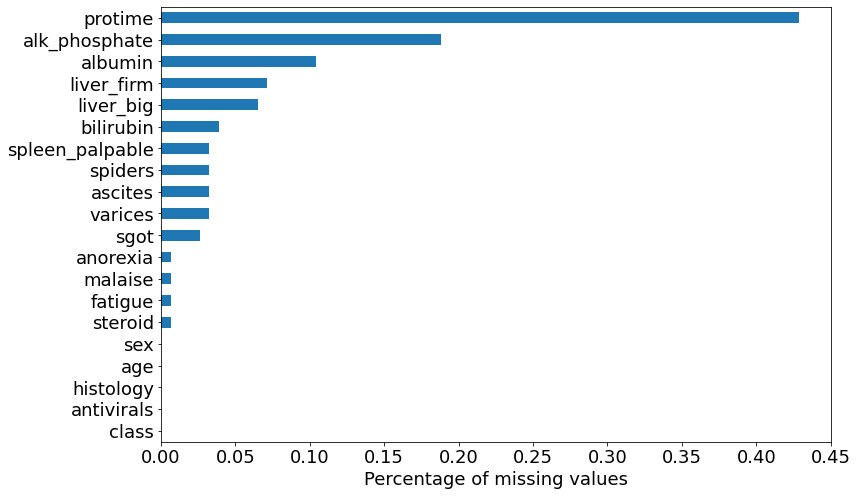

In [26]:
(data.isnull().sum().sort_values()/len(data)).plot(kind = 'barh');
plt.xlabel("Percentage of missing values");

#### From the bar chart above, sex, age, histology, antivirals nad class attributes have no missing value. Missing values for other attributes varies from very few percentage to more than 40%

In [60]:
# replace missing values (np.nan) with zeros
data = data.replace(np.nan,0)

# change some of the column to int type
int_columns = [col for col in list(data.columns) if data[col].dtypes != int if col not in ("bilirubin","albumin")]
data[int_columns] = data[int_columns].astype(int)

# change both bilirubin and albumin columns to float
data[['bilirubin','albumin']] = data[['bilirubin','albumin']].astype(float)
# check the data types
data.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [59]:
data.isnull().sum().sort_values()

class              0
albumin            0
sgot               0
alk_phosphate      0
bilirubin          0
varices            0
ascites            0
spiders            0
spleen_palpable    0
liver_firm         0
liver_big          0
anorexia           0
malaise            0
fatigue            0
antivirals         0
steroid            0
sex                0
age                0
protime            0
histology          0
dtype: int64

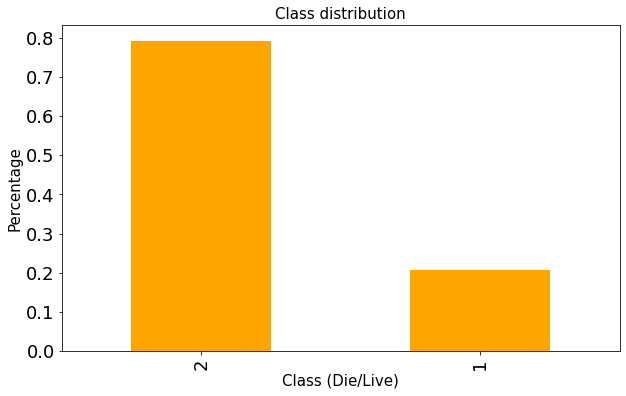

In [27]:
# Check for class imbalance in the target variable
(data['class'].value_counts()/len(data)).plot(kind='bar', color = 'orange',figsize=(10, 6), stacked=False)
plt.xlabel("Class (Die/Live)", fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title("Class distribution", fontsize=15);

### The target is skewed as indicated by the class distribution plot above. 2 represents the people tha lives while 1 represents those tha dies from hepatitis.

In [62]:
data.age.max()

78

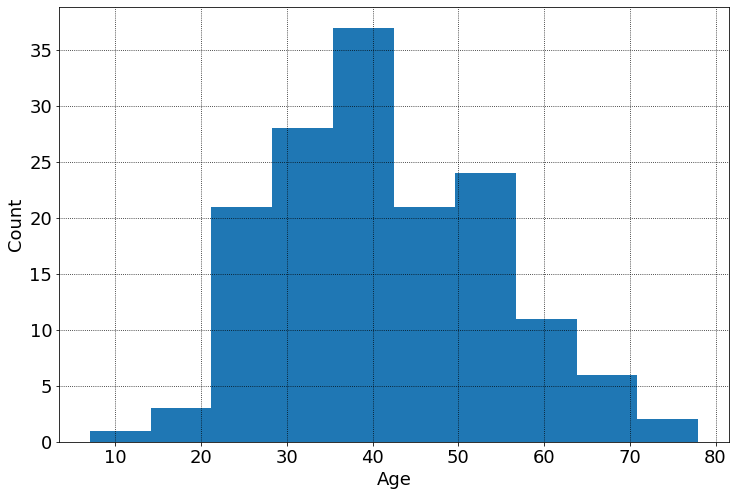

In [64]:
#Age distribution
data["age"].hist()
plt.xlabel('Age')
plt.ylabel('Count');

### Age distribution shows normal distribution

In [66]:
# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

In [65]:
# data.columns[data.dtypes=='O'].nunique()

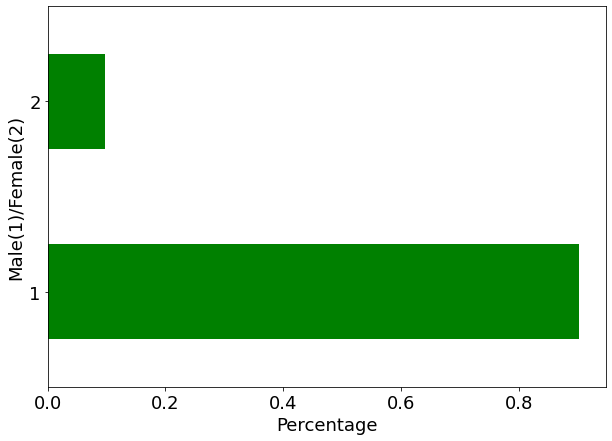

In [69]:
(data.sex.value_counts()/len(data)).plot(kind = "barh", figsize =(10,7), color = "green")
plt.xlabel("Percentage")
plt.ylabel("Male(1)/Female(2)");

#### There are about 80% more male than female

In [70]:
# descriptive statistics
data.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1.792208,41.272727,1.097403,1.500000,1.844156,1.337662,1.590909,1.779221,1.714286,1.467532,1.740260,1.603896,1.805195,1.818182,1.374675,85.623377,84.103896,3.419481,35.344156,1.454545
std,0.407051,12.574106,0.297473,0.514496,0.363891,0.488037,0.506347,0.431546,0.579771,0.627984,0.508814,0.553289,0.472484,0.463780,1.223600,62.264151,89.661686,1.321817,35.221870,0.499554
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,50.500000,31.000000,3.025000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,83.000000,56.500000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.750000,99.500000,4.200000,65.500000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [76]:
# Check features correlation with the target 
correlation = data.corr()
correlation.iloc[:,0].sort_values(ascending = False)

class              1.000000
ascites            0.331895
spiders            0.328650
malaise            0.314228
albumin            0.295469
fatigue            0.289698
varices            0.248646
spleen_palpable    0.179508
sex                0.168242
protime            0.158651
liver_firm         0.152417
steroid            0.124835
anorexia           0.109207
liver_big          0.106824
alk_phosphate     -0.050816
sgot              -0.054383
antivirals        -0.131803
age               -0.217434
histology         -0.336033
bilirubin         -0.423997
Name: class, dtype: float64

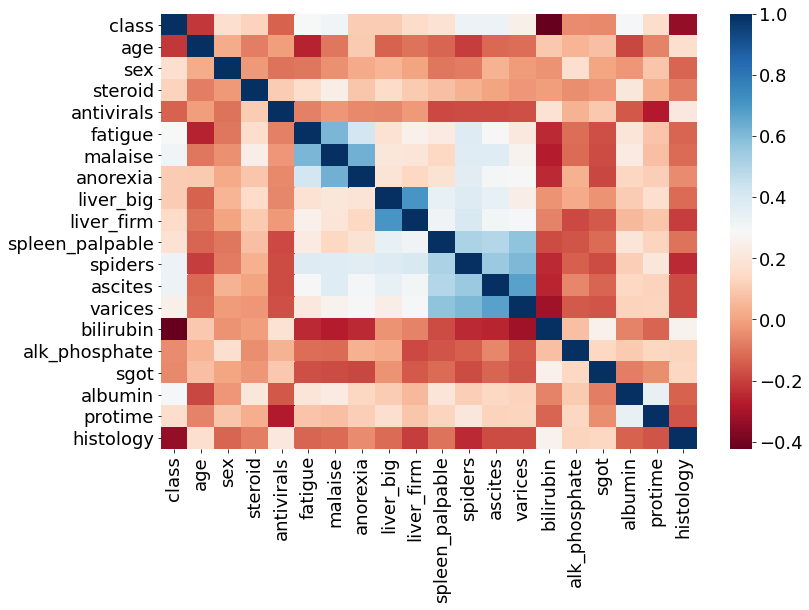

In [81]:
# heatmap to highlight correction between features and the target
_= sns.heatmap(data[list(data.columns)].corr(), cmap='RdBu', annot= False)

In [107]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
databy_age = pd.cut(
        data["age"], bins = 8, labels = labels
    )

In [108]:
databy_age.value_counts()/len(data)

30-40           0.305195
40-50           0.214286
20-30           0.201299
50-60           0.116883
10-20           0.071429
60-70           0.064935
70 and more     0.019481
Less than 10    0.006494
Name: age, dtype: float64

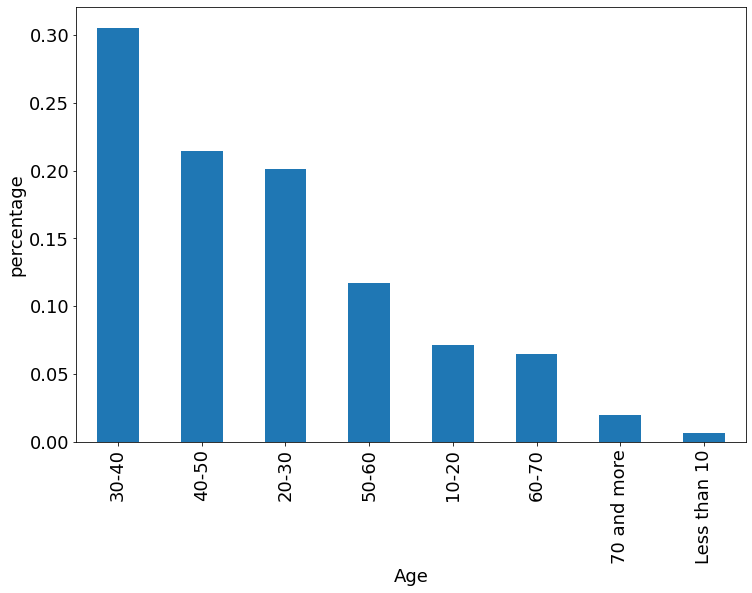

In [112]:
(databy_age.value_counts()/len(data)).plot(kind="bar")
plt.xlabel("Age")
plt.ylabel("percentage");

In [90]:
databy_age

age
0     1
1     3
2    21
3    28
4    37
5    21
6    24
7    11
8     6
9     2
dtype: int64

In [86]:
data.age.value_counts()

38    8
34    8
36    7
30    7
50    6
39    6
51    6
45    5
37    5
42    5
28    5
54    5
44    5
32    4
27    4
47    4
23    4
31    4
33    3
41    3
40    3
52    3
49    3
56    3
61    3
25    3
20    3
48    2
57    2
58    2
62    2
24    2
22    2
35    2
26    1
78    1
43    1
72    1
46    1
53    1
59    1
60    1
64    1
65    1
66    1
67    1
69    1
70    1
7     1
Name: age, dtype: int64

In [85]:
databy_age.value_counts()

4    37
3    28
6    24
5    21
2    21
7    11
8     6
1     3
9     2
0     1
Name: age, dtype: int64

## Data modelling

## Model evaluation